In [1]:
import numpy as np
import openpyxl as xl
import matplotlib.pyplot as plt

In [2]:
sheetname = 'Ni2020'

In [3]:
import openpyxl
import numpy as np

# defining function of calculating HHI index
def HHIndex(data,col) -> float:
    total = np.sum(data[col])
    return np.sum((data[col] / total) ** 2)

# Load the workbook
workbook = openpyxl.load_workbook('Data/USGS.xlsx')

# Select a sheet
sheet = workbook[sheetname]

# Read the data from the sheet
data = []
for row in sheet.iter_rows(values_only=True):
    # check if the row is empty
    if all([cell == None for cell in row]):
        continue
    data.append(row)

# setting up columns
cols = ['Country', 'Reserves']
for i,element in enumerate(data[1]):
    cols.insert(i,f'MineProduction{element}') if element != None else None

# create a dtype for the data
dtype = [(name, 'U20') if name == 'Country' else (name, 'i8') for name in cols]

data = np.array(data[2:], dtype=dtype)
data[::-1].sort(order='Reserves') # from the biggest guy to the smallest

HHI = HHIndex(data,'MineProduction2020')
print( HHI )

if HHI < 0.01:
    print('Highly competitive market (very well distributed production)')
elif HHI < 0.15:
    print('Unconcentrated production')
elif HHI < 0.25:
    print('Moderate concentration')
elif HHI < 0.5:
    print('High concentration')
else:
    print('Monopoly or highly monopolistic market (quasi monopoly)')



0.1564730129578614
Moderate concentration


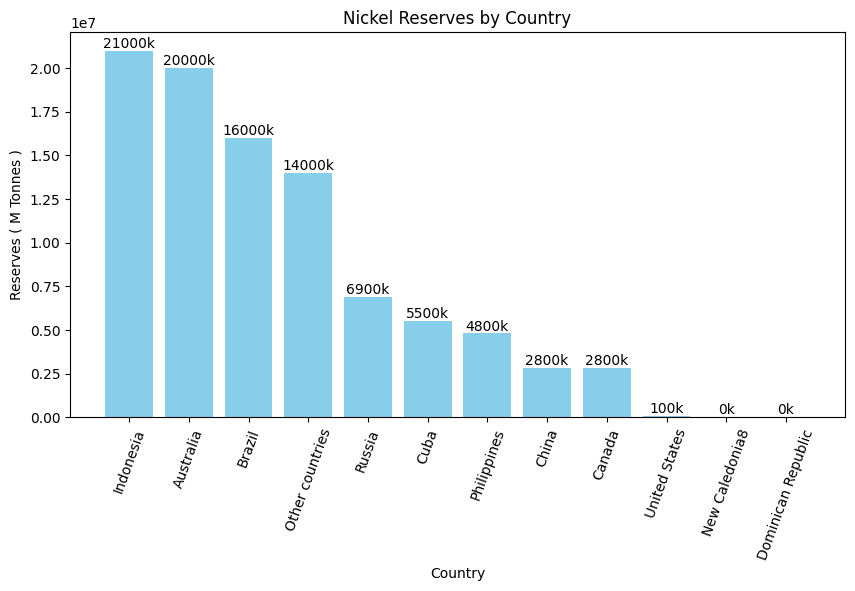

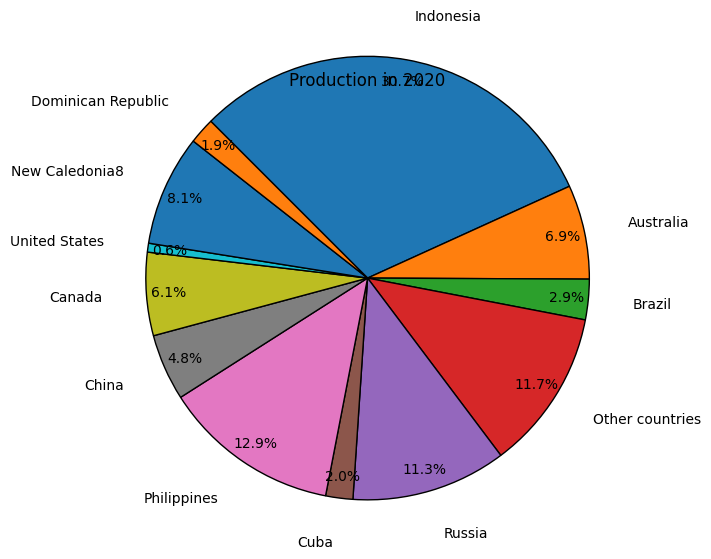

In [4]:
fig , ax_1 = plt.subplots( figsize=(10, 5))
ax_1.bar(data['Country'], data['Reserves'], color='skyblue')
ax_1.set_xlabel('Country')
ax_1.set_ylabel('Reserves ( M Tonnes )')
ax_1.set_title('Nickel Reserves by Country')
plt.xticks(rotation=70)
# add values at the top of each bar
for i in range(len(data)):
    plt.text(i, data['Reserves'][i], f'{data['Reserves'][i] / 1000:.0f}k', ha='center', va='bottom')

plt.show()

# Create the pie chart
plt.pie(data['MineProduction2020'], labels=data['Country'], autopct='%1.1f%%' , startangle=135, shadow=False, counterclock=False, labeldistance=1.2, pctdistance=0.9, radius=1.5, rotatelabels=False, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Production in 2020')

# rotate the labels
plt.gca().set_aspect('equal')

# Display the chart
plt.show()